In [97]:
import pandas as pd
import random
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

In [98]:
df = pd.read_csv('/kaggle/input/credit-data/credit_data.csv')

In [99]:
df.shape

(2000, 5)

In [100]:
df.head()

,clientid,income,age,loan,default
0,1,66155.92510,59.017015,8106.532131,0
1,2,34415.15397,48.117153,6564.745018,0
2,3,57317.17006,63.108049,8020.953296,0
3,4,42709.53420,45.751972,6103.642260,0
4,5,66952.68885,18.584336,8770.099235,1


In [101]:
df.dropna(inplace=True) #apagar os clientes que está sem a idade
df.shape

(1997, 5)

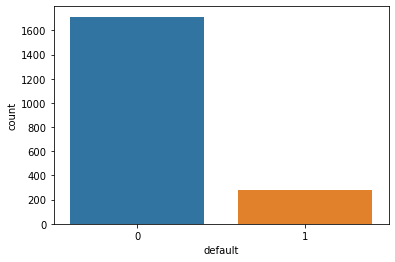

In [102]:
sns.countplot(x=df['default']);

Primeiro gráfico temos a sepraração dos que pagaram empréstimo e de quem não pagou empréstimo

In [103]:
X = df.iloc[:, 1:4].values

In [104]:
X.shape

(1997, 3)

In [105]:
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365795e+04, 5.61526170e+01, 7.37883360e+03]])

In [106]:
y = df.iloc[:, 4].values

In [107]:
y.shape

(1997,)

In [108]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [109]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2, stratify = y)

In [110]:
X_treinamento.shape, y_treinamento.shape

((1597, 3), (1597,))

In [111]:
X_teste.shape, y_teste.shape

((400, 3), (400,))

In [112]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [113]:
1714 / len(df), 283 / len(df)

(0.8582874311467201, 0.14171256885327993)

In [114]:
np.unique(y_treinamento, return_counts=True)

(array([0, 1]), array([1371,  226]))

In [115]:
226 / len(y_treinamento)

0.14151534126487164

In [116]:
np.unique(y_teste, return_counts=True)

(array([0, 1]), array([343,  57]))

In [117]:
57 / len(y_teste)

0.1425

In [118]:
modelo = GaussianNB()
modelo.fit(X_treinamento, y_treinamento)

GaussianNB()

In [119]:
previsoes = modelo.predict(X_teste)

In [120]:
previsoes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [121]:
y_teste

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [122]:
accuracy_score(y_teste,previsoes) 

0.915

In [123]:
cm = confusion_matrix(y_teste,previsoes) #Corrigido 04/10/2021
cm

array([[337,   6],
       [ 28,  29]])

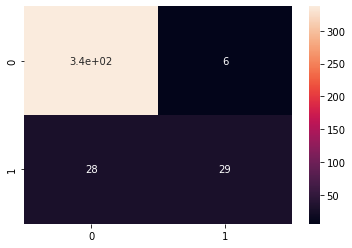

In [124]:
sns.heatmap(cm, annot=True);

In [125]:
(336 + 32) / (336 + 25 + 7 + 32)

0.92

In [126]:
# Percentual de acerto para pessoas que pagam o empréstimo
336 / (336 + 25)

0.9307479224376731

In [127]:
# Percentual de acerto para pessoas que não pagam o empréstimo
32 / (32 + 7)

0.8205128205128205

In [128]:
# Perdas: 5.000
# Clientes não pagadores: 1.000
1000 * 18 / 100

180.0

In [129]:
180 * 5000

900000

In [130]:
tl = TomekLinks(sampling_strategy='majority')
X_under, y_under = tl.fit_resample(X, y)

In [131]:
X_under.shape, y_under.shape

((1897, 3), (1897,))

In [132]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [133]:
np.unique(y_under, return_counts=True)

(array([0, 1]), array([1614,  283]))

In [134]:
X_treinamento_u, X_teste_u, y_treinamento_u, y_teste_u = train_test_split(X_under,
                                                                          y_under,
                                                                          test_size=0.2,
                                                                          stratify=y_under)
X_treinamento_u.shape, X_teste_u.shape

((1517, 3), (380, 3))

In [135]:
modelo_u = GaussianNB()
modelo_u.fit(X_treinamento_u, y_treinamento_u)
previsoes_u = modelo_u.predict(X_teste_u)
accuracy_score(y_teste_u,previsoes_u )

0.9078947368421053

In [136]:
cm_u = confusion_matrix(y_teste_u, previsoes_u) 
cm_u

array([[316,   7],
       [ 28,  29]])

In [137]:
315 / (315 + 26)

0.9237536656891495

In [138]:
31 / (31 + 8)

0.7948717948717948

In [139]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X, y) 

In [140]:
X_over.shape, y_over.shape

((3428, 3), (3428,))

In [141]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [142]:
np.unique(y_over, return_counts=True)

(array([0, 1]), array([1714, 1714]))

In [144]:
X_treinamento_o, X_teste_o, y_treinamento_o, y_teste_o = train_test_split(X_over, y_over,
                                                                          test_size = 0.2,
                                                                          stratify=y_over)

In [145]:
X_treinamento_o.shape, X_teste_o.shape

((2742, 3), (686, 3))

In [146]:
modelo_o = GaussianNB()
modelo_o.fit(X_treinamento_o, y_treinamento_o)
previsoes_o = modelo_o.predict(X_teste_o)
accuracy_score(y_teste_o, previsoes_o)

0.9081632653061225

In [147]:
cm_o = confusion_matrix(y_teste_o, previsoes_o) 
cm_o

array([[298,  45],
       [ 18, 325]])

In [149]:
305 / (305 + 19)

0.941358024691358

In [150]:
324 / (324 + 38)

0.8950276243093923

In [151]:
# Perdas: 5.000
# Cliente não pagadores: 1.000
1000 * 11 / 100

110.0

In [152]:
110 * 5000

550000

In [153]:
900000 - 550000

350000